In [34]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
df=pd.read_csv("/Users/joey/Documents/Banque.csv", decimal=',',sep=";", encoding="latin1") 
df.head()

ID  Age  Experience  Revenu  Famille  Dépense mensuelles  Education  \
0   1   25           1      49        4                1600          1   
1   2   45          19      34        3                1500          1   
2   3   39          15      11        1                1000          1   
3   4   35           9     100        1                2700          2   
4   5   35           8      45        4                1000          2   

  Compte Epargne Logement Prêt Personnel  
0                     Non            Non  
1                     Non            Non  
2                     Non            Non  
3                     Non            Non  
4                     Non            Non

In [36]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split  ### permet de partager DA et DT
from sklearn.model_selection import StratifiedShuffleSplit   ### Fonction qui permet de faire des échantillonnage stratifié
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [37]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split  ### permet de partager DA et DT
from sklearn.model_selection import StratifiedShuffleSplit   ### Fonction qui permet de faire des échantillonnage stratifié
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [38]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_predict = model.predict(X_test)
    y_pred = ( y_predict > 0.5).astype(int)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = round(accuracy_score(y_true, y_pred),2)
    precision = round(precision_score(y_true, y_pred),2)
    recall = round(recall_score(y_true, y_pred),2)
    

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    

    # Tracer la courbe ROC
    
    fpr, tpr, _ = roc_curve(y_true, y_predict)
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()
    

In [39]:
df.columns

Index(['ID', 'Age', 'Experience', 'Revenu', 'Famille', 'Dépense mensuelles',
       'Education', 'Compte Epargne Logement', 'Prêt Personnel'],
      dtype='object')

In [40]:
df=df.drop(columns=['ID','Age','Experience'])
var = df.columns
print(var)


Index(['Revenu', 'Famille', 'Dépense mensuelles', 'Education',
       'Compte Epargne Logement', 'Prêt Personnel'],
      dtype='object')


In [41]:
df.columns=['RM','FAM','DM','EDU','EL','Prêt']

In [42]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
# Utilisez la fonction map pour coder 'non' par 0 et 'oui' par 1
df['Prêt'] = df['Prêt'].map({'Non': 0, 'Oui': 1})


In [43]:
df = sm.add_constant(df)

In [44]:
df3 = pd.get_dummies(df, columns=(['EL','EDU']),drop_first=True).astype(int)
df3[0:3]
df3.head()

const   RM  FAM    DM  Prêt  EL_Oui  EDU_2  EDU_3
0      1   49    4  1600     0       0      0      0
1      1   34    3  1500     0       0      0      0
2      1   11    1  1000     0       0      0      0
3      1  100    1  2700     0       0      1      0
4      1   45    4  1000     0       0      1      0

In [45]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Supposons que votre DataFrame s'appelle df
# Créer la variable cible (y) et les features (X)
X = df3[['RM','FAM','DM','EDU_2','EDU_3','EL_Oui']]
y = df3['Prêt']


In [46]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=452)
for train_index, test_index in strat.split(df3, df3["Prêt"]):
    strat_train = df3.loc[train_index]
    strat_test = df3.loc[test_index]


In [47]:
strat_train["Prêt"].value_counts()
strat_train["Prêt"].value_counts(normalize=True)

Prêt
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [48]:
y_a=strat_train["Prêt"]
y_a.head(), type(y_a)

(1225    0
 1615    0
 3646    0
 3049    0
 4823    0
 Name: Prêt, dtype: int64,
 pandas.core.series.Series)

In [49]:
X_a=strat_train.drop(columns=["Prêt"])
X_a.head(), type(X_a)

(      const   RM  FAM    DM  EL_Oui  EDU_2  EDU_3
 1225      1  110    1  4000       0      0      0
 1615      1   73    1   800       0      1      0
 3646      1   43    3   500       0      0      1
 3049      1   50    4  2100       0      0      1
 4823      1   28    1  1200       0      0      1,
 pandas.core.frame.DataFrame)

In [50]:
model4 = sm.Logit(y_a, X_a)
result4 = model4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.125917
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                            6
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.6068
Time:                        23:46:08   Log-Likelihood:                -431.27
converged:                       True   LL-Null:                       -1096.8
Covariance Type:            nonrobust   LLR p-value:                1.959e-284
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5852      0.670    -20.267      0.000     -14.899     -12.271
RM             0.0629      0.004     17.775      0.000       0.056       0.070
FAM            0.5462      0.088      6.222      0.000       0.374       0.718
DM          8.887e-05   5.15e-05      1.725      0.084   -1.21e-05       0.000
EL_Oui         2.4141      0.288      8.381      0.000       1.850       2.979
EDU_2          4.1790      0.321     13.000      0.000       3.549       4.809
EDU_3          4.1584      0.312     13.315      0.000       3.546       4.771
==============================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [51]:
X1_t=strat_test.drop(columns=["Prêt"])

In [52]:
y1_t=strat_test["Prêt"]

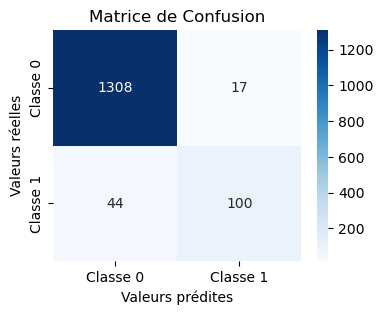

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.96
Précision: 0.85
Rappel: 0.69
L'AUC du modèle Modèle Logit est : 0.9571


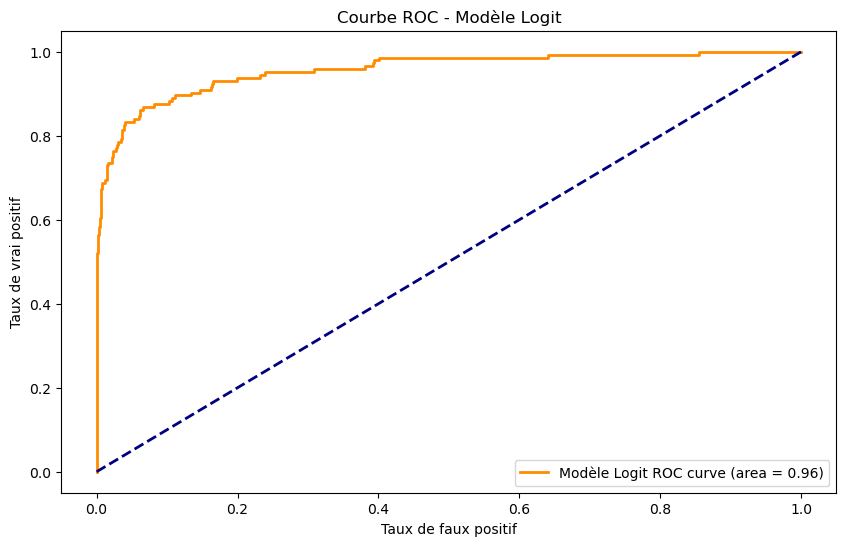

In [53]:
evaluate_model(result4,X1_t,y1_t,"Modèle Logit",plot_roc=True)

#### On le fait avec la fonction Logisticregression de Sklearn

In [54]:
model = LogisticRegression(fit_intercept=False)
result5_1=model.fit(X_a, y_a)
result5_1.coef_ 


/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-9.71596202e+00,  4.56136393e-02,  4.61450612e-01,
         4.36090234e-05,  2.45045580e+00,  1.56825385e+00,
         2.45780402e+00]])

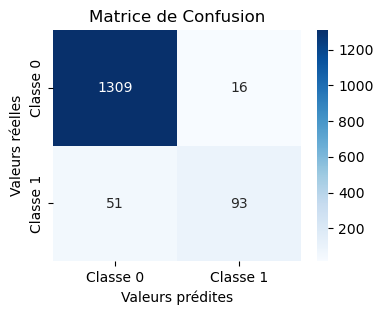

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.95
Précision: 0.85
Rappel: 0.65
L'AUC du modèle Modèle Logit est : 0.8169


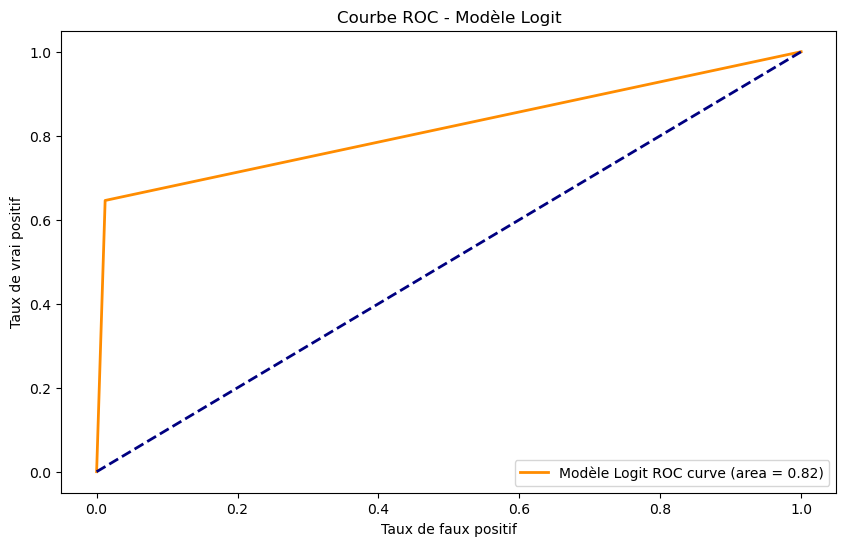

In [55]:
evaluate_model(result5_1,X1_t,y1_t,"Modèle Logit",plot_roc=True)

In [56]:
y_t=strat_test["Prêt"]
y_proba = result5_1.predict_proba(X1_t)
fpr, tpr, _ = roc_curve(y1_t,y_proba[:, 1])
auc_score = auc(fpr, tpr)
print("L'AUC du modèle est : " , auc_score)

L'AUC du modèle est :  0.963485324947589


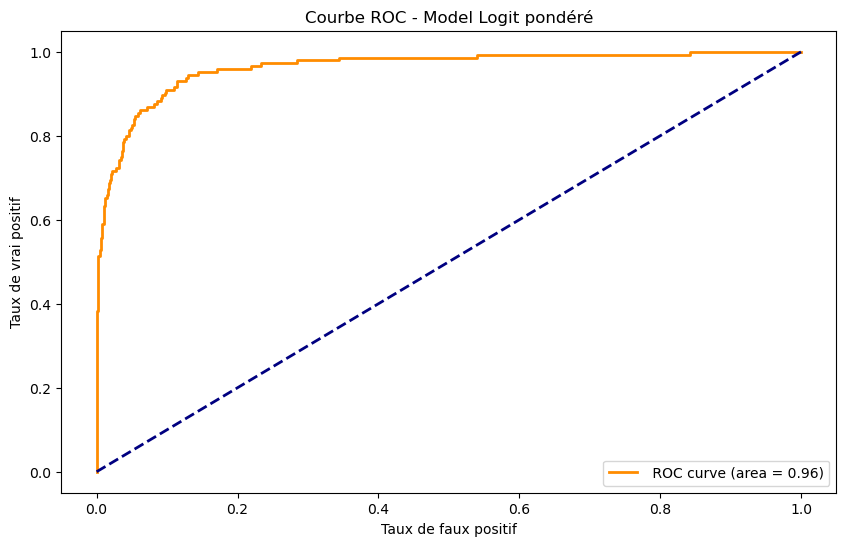

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=' ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe ROC - Model Logit pondéré')
plt.legend(loc='lower right')
plt.show()

In [58]:
logit = sm.GLM(y_a, X_a, family=sm.families.Binomial())
result_log=logit.fit()

In [59]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3418
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -431.27
Date:                Sun, 04 Feb 2024   Deviance:                       862.53
Time:                        23:46:13   Pearson chi2:                 1.34e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3220
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5852      0.670    -20.267      0.000     -14.899     -12.271
RM             0.0629      0.004     17.775      0.000       0.056       0.070
FAM            0.5462      0.088      6.222      0.000       0.374       0.718
DM          8.887e-05   5.15e-05      1.725      0.084   -1.21e-05       0.000
EL_Oui         2.4141      0.288      8.381      0.000       1.850       2.979
EDU_2          4.1790      0.321     13.000      0.000       3.549       4.809
EDU_3          4.1584      0.312     13.315      0.000       3.546       4.771
==============================================================================
"""

In [60]:
probit= sm.GLM(y_a, X_a,family=sm.families.Binomial(link=sm.families.links.probit()))
result_probit=probit.fit()
result_probit.summary()

/Users/joey/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3418
Model Family:                Binomial   Df Model:                            6
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -447.87
Date:                Sun, 04 Feb 2024   Deviance:                       895.75
Time:                        23:46:14   Pearson chi2:                 7.65e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3154
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6689      0.291    -22.951      0.000      -7.238      -6.099
RM             0.0309      0.002     19.209      0.000       0.028       0.034
FAM            0.2808      0.044      6.320      0.000       0.194       0.368
DM          4.993e-05    2.6e-05      1.920      0.055   -1.04e-06       0.000
EL_Oui         1.2632      0.148      8.543      0.000       0.973       1.553
EDU_2          1.8613      0.148     12.588      0.000       1.571       2.151
EDU_3          1.8694      0.144     13.012      0.000       1.588       2.151
==============================================================================
"""

In [61]:
cloglog= sm.GLM(y_a, X_a,family=sm.families.Binomial(link=sm.families.links.CLogLog()))
result_cloglog=cloglog.fit()
result_cloglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                     3418
Model Family:                Binomial   Df Model:                            6
Link Function:                CLogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -431.71
Date:                Sun, 04 Feb 2024   Deviance:                       863.41
Time:                        23:46:14   Pearson chi2:                 7.41e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3219
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4962      0.518    -22.213      0.000     -12.511     -10.482
RM             0.0501      0.003     18.925      0.000       0.045       0.055
FAM            0.4020      0.067      5.960      0.000       0.270       0.534
DM          6.696e-05   4.02e-05      1.666      0.096   -1.18e-05       0.000
EL_Oui         1.4300      0.215      6.645      0.000       1.008       1.852
EDU_2          3.7529      0.257     14.631      0.000       3.250       4.256
EDU_3          3.7116      0.247     15.020      0.000       3.227       4.196
==============================================================================
"""

### Les évaluations des modèles

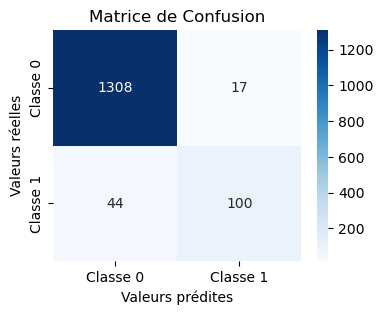

 Métriques d'évaluation pour le modèle Modèle Logit : 
Exactitude: 0.96
Précision: 0.85
Rappel: 0.69
L'AUC du modèle Modèle Logit est : 0.9571


In [62]:
evaluate_model(result_log,X1_t,y1_t,"Modèle Logit")

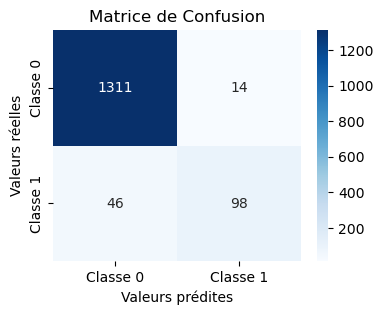

 Métriques d'évaluation pour le modèle Modèle Probit : 
Exactitude: 0.96
Précision: 0.88
Rappel: 0.68
L'AUC du modèle Modèle Probit est : 0.9609


In [63]:
evaluate_model(result_probit,X1_t,y1_t,"Modèle Probit")

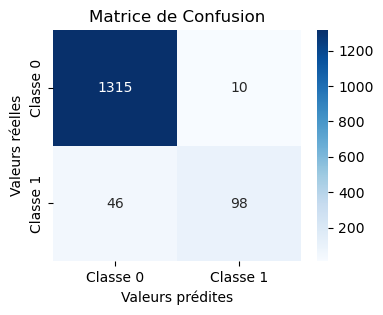

 Métriques d'évaluation pour le modèle Modèle cloglog : 
Exactitude: 0.96
Précision: 0.91
Rappel: 0.68
L'AUC du modèle Modèle cloglog est : 0.9489


In [64]:
evaluate_model(result_cloglog,X1_t,y1_t,"Modèle cloglog")

### Pour les courbes ROC

In [65]:
## Logit

y_predict_L = result_log.predict(X1_t)
fprL, tprL, _ = roc_curve(y1_t, y_predict_L)
auc_score_L = auc(fprL, tprL)

## Probit

y_predict_P = result_probit.predict(X1_t)
fprP, tprP, _ = roc_curve(y1_t, y_predict_P)
auc_score_P = auc(fprP, tprP)

## Cloglog

y_predict_Log = result_cloglog.predict(X1_t)
fprLog, tprLog, _ = roc_curve(y1_t, y_predict_Log)
auc_score_Log = auc(fprLog, tprLog)



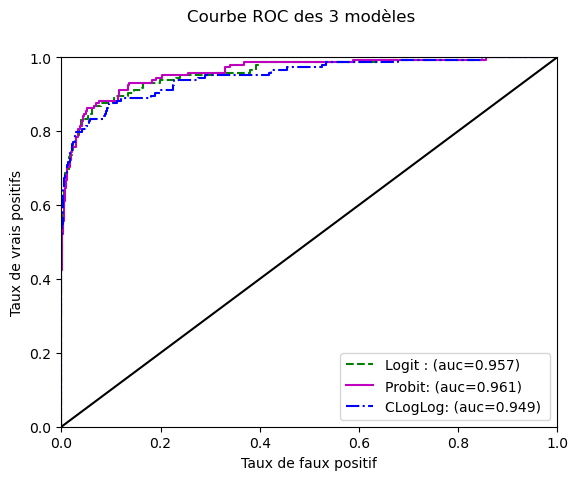

In [66]:
# pour le logit, Probit,SVM, Arbre Gini et Arbre Entropie

plt.plot(fprL,tprL,"g--",label='Logit : (auc={:.3f}) '.format(auc_score_L))
plt.plot(fprP,tprP,"m-",label='Probit: (auc={:.3f}) '.format(auc_score_P))
plt.plot(fprLog,tprLog,"b-.",label='CLogLog: (auc={:.3f}) '.format(auc_score_Log))

# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.suptitle("Courbe ROC des 3 modèles")
plt.show()

## Utilisation de ceci pour des données déséquilibrées

Dnas GLM de SM, il y a la possibilité de mettre les poids avec un eoption ***freq_weights***. Il s nécessaire d'avoir les poids pur toutes les valeurs de la variable dépendante.

### Evaluation avec les poids 

In [67]:
# Calculer l'inverse de chaque fréquence pour obtenir les poids

valeur = y_a.value_counts(normalize=True)
valeur

Prêt
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [68]:
valeur[y_a]

Prêt
0    0.90219
0    0.90219
0    0.90219
0    0.90219
0    0.90219
      ...   
0    0.90219
0    0.90219
0    0.90219
0    0.90219
0    0.90219
Name: proportion, Length: 3425, dtype: float64

In [69]:
# Calculer l'inverse de chaque fréquence pour obtenir les poids

inverse_frequences = 1 / valeur[y_a]
inverse_frequences

Prêt
0    1.108414
0    1.108414
0    1.108414
0    1.108414
0    1.108414
       ...   
0    1.108414
0    1.108414
0    1.108414
0    1.108414
0    1.108414
Name: proportion, Length: 3425, dtype: float64

In [70]:
logit3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial())
result_log3=logit3.fit()
result_log3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.8
Date:                Sun, 04 Feb 2024   Deviance:                       3515.5
Time:                        23:46:24   Pearson chi2:                 9.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.8256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0536      0.271    -37.065      0.000     -10.585      -9.522
RM             0.0581      0.002     35.856      0.000       0.055       0.061
FAM            0.5483      0.040     13.803      0.000       0.470       0.626
DM             0.0001   2.63e-05      5.221      0.000    8.56e-05       0.000
EL_Oui         2.5727      0.158     16.330      0.000       2.264       2.881
EDU_2          2.7343      0.123     22.290      0.000       2.494       2.975
EDU_3          2.8280      0.121     23.338      0.000       2.591       3.066
==============================================================================
"""

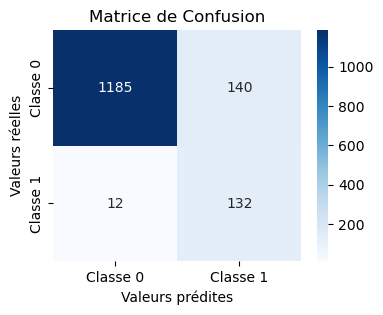

 Métriques d'évaluation pour le modèle Logit avec les poids : 
Exactitude: 0.9
Précision: 0.49
Rappel: 0.92
L'AUC du modèle Logit avec les poids est : 0.9657


In [39]:
evaluate_model(result_log3,X1_t,y1_t,"Logit avec les poids")

###  Les rapports de côtes

In [40]:
probit3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial(link=sm.families.links.probit()))
result_probit3=probit3.fit()
result_probit3.summary()


/Users/joey/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1786.6
Date:                Wed, 31 Jan 2024   Deviance:                       3573.2
Time:                        22:59:10   Pearson chi2:                 4.93e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.8226
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3471      0.130    -41.068      0.000      -5.602      -5.092
RM             0.0310      0.001     39.525      0.000       0.029       0.032
FAM            0.2909      0.021     13.571      0.000       0.249       0.333
DM          7.989e-05   1.43e-05      5.595      0.000    5.19e-05       0.000
EL_Oui         1.3316      0.083     15.995      0.000       1.168       1.495
EDU_2          1.4442      0.064     22.549      0.000       1.319       1.570
EDU_3          1.4900      0.063     23.620      0.000       1.366       1.614
==============================================================================
"""

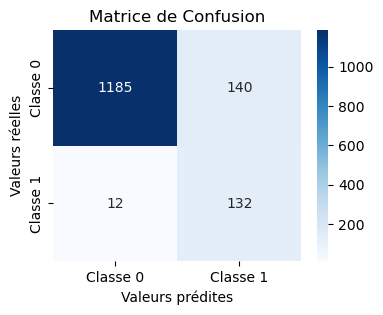

 Métriques d'évaluation pour le modèle  Probit avec les poids : 
Exactitude: 0.9
Précision: 0.49
Rappel: 0.92
L'AUC du modèle  Probit avec les poids est : 0.9658


In [41]:
evaluate_model(result_probit3,X1_t,y1_t," Probit avec les poids")

In [42]:
result_probit3.conf_int()

0         1
const  -5.602281 -5.091899
RM      0.029427  0.032498
FAM     0.248893  0.332922
DM      0.000052  0.000108
EL_Oui  1.168433  1.494770
EDU_2   1.318705  1.569770
EDU_3   1.366353  1.613630

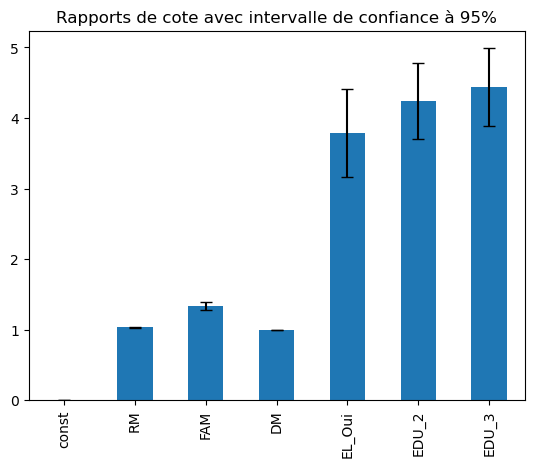

In [44]:
RC = np.exp(result_probit3.params)
CI = np.exp(result_probit3.conf_int())

fig, ax = plt.subplots()
RC.plot(ax=ax, kind='bar', yerr=(CI[1] - CI[0])/2, capsize=4)
ax.set_title('Rapports de cote avec intervalle de confiance à 95%')
plt.show()

In [45]:
cloglog3 = sm.GLM(y_a, X_a,freq_weights=inverse_frequences ,family=sm.families.Binomial(link=sm.families.links.CLogLog()))
result_cloglog3=cloglog3.fit()
result_cloglog3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Prêt   No. Observations:                 3425
Model:                            GLM   Df Residuals:                  6843.00
Model Family:                Binomial   Df Model:                            6
Link Function:                CLogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.1
Date:                Wed, 31 Jan 2024   Deviance:                       3622.2
Time:                        22:59:38   Pearson chi2:                 4.99e+13
No. Iterations:                   100   Pseudo R-squ. (CS):             0.8200
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0258      0.172    -40.847      0.000      -7.363      -6.689
RM             0.0363      0.001     38.100      0.000       0.034       0.038
FAM            0.3623      0.025     14.766      0.000       0.314       0.410
DM          4.807e-05   1.51e-05      3.179      0.001    1.84e-05    7.77e-05
EL_Oui         1.3035      0.086     15.099      0.000       1.134       1.473
EDU_2          2.1264      0.078     27.318      0.000       1.974       2.279
EDU_3          2.1435      0.077     27.818      0.000       1.993       2.295
==============================================================================
"""

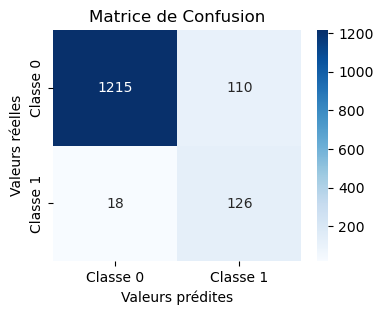

 Métriques d'évaluation pour le modèle Cloglog avec les poids : 
Exactitude: 0.91
Précision: 0.53
Rappel: 0.88
L'AUC du modèle Cloglog avec les poids est : 0.9604


In [46]:
evaluate_model(result_cloglog3,X1_t,y1_t,"Cloglog avec les poids")

In [47]:
## Logit

y_predict_L = result_log3.predict(X1_t)
fprL, tprL, _ = roc_curve(y1_t, y_predict_L)
auc_score_L = auc(fprL, tprL)

## Probit

y_predict_P = result_probit3.predict(X1_t)
fprP, tprP, _ = roc_curve(y1_t, y_predict_P)
auc_score_P = auc(fprP, tprP)

## Cloglog

y_predict_Log = result_cloglog3.predict(X1_t)
fprLog, tprLog, _ = roc_curve(y1_t, y_predict_Log)
auc_score_Log = auc(fprLog, tprLog)


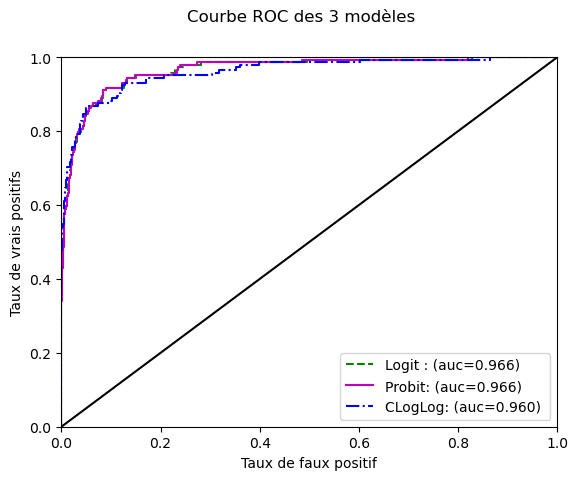

In [48]:
# pour le logit, Probit,SVM, Arbre Gini et Arbre Entropie

plt.plot(fprL,tprL,"g--",label='Logit : (auc={:.3f}) '.format(auc_score_L))
plt.plot(fprP,tprP,"m-",label='Probit: (auc={:.3f}) '.format(auc_score_P))
plt.plot(fprLog,tprLog,"b-.",label='CLogLog: (auc={:.3f}) '.format(auc_score_Log))

# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.suptitle("Courbe ROC des 3 modèles")
plt.show()

### **Prevision pour de nouvelles données**

In [49]:
df_Nvlle=pd.read_csv("/Users/joey/Documents/Banque_Nvlle.csv", sep=";", decimal=",",encoding="latin1") 
df_Nvlle,df_Nvlle.shape

(    ID  Age  Experience  Revenu Millier    Famille  \
 0    1   64          39                 85        4   
 1    2   52          26                 28        2   
 2    3   58          34                 41        4   
 3    4   52          22                154        1   
 4    5   43          18                 41        1   
 5    6   56          32                 33        3   
 6    7   37          12                182        3   
 7    8   53          27                 59        2   
 8    9   27           2                129        2   
 9   10   53          27                 35        3   
 10  11   42          16                185        3   
 11  12   58          34                 45        4   
 12  13   36          12                 62        4   
 13  14   53          28                183        3   
 14  15   48          22                 14        2   
 15  16   54          28                 53        1   
 16  17   26           1                 48     

In [140]:
df_Nvlle=df_Nvlle.drop(columns=['ID','Age','Experience'])
var = df_Nvlle.columns
print(var)

Index(['Revenu Millier  ', 'Famille', 'Dépense mensuellesmoyenne   ',
       'Education', 'Compte Epargne Logement'],
      dtype='object')


In [51]:
df_Nvlle.columns=['RM','FAM','DM','EDU','EL']

In [52]:
df_Nvlle = sm.add_constant(df_Nvlle)

In [53]:
df_Nvlle1 = pd.get_dummies(df_Nvlle, columns=(['EL','EDU']),drop_first=True).astype(int)
df_Nvlle1[0:3]

const  RM  FAM    DM  EL_Oui  EDU_2  EDU_3
0      1  85    4  3400       0      1      0
1      1  28    2   700       0      1      0
2      1  41    4   400       0      0      0

In [54]:
result_probit3.predict(df_Nvlle1)

0     0.565227
1     0.008239
2     0.001976
3     0.998322
4     0.011520
5     0.000430
6     0.999996
7     0.083091
8     0.305919
9     0.033716
10    0.999987
11    0.107110
12    0.208525
13    0.999998
14    0.002300
15    0.040110
16    0.098447
17    0.220620
18    0.068701
19    0.000778
20    0.000994
21    0.089564
22    0.019590
23    0.000710
24    0.062215
25    0.000364
26    0.030037
27    0.009041
28    0.514917
29    0.160453
dtype: float64

In [55]:
(result_probit3.predict(df_Nvlle1) > 0.5).astype(int)

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
dtype: int64

## Arbres


In [56]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
# Scikit-Learn
import sklearn as sk
from sklearn.linear_model import LogisticRegression    
from sklearn import svm
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# StatsModels
import statsmodels.api as sm

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_predict = model.predict(X_test)
    y_proba=model.predict_proba(X_test)
    y_pred = ( y_predict > 0.5).astype(int)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    

    # Tracer la courbe ROC
    
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()

In [58]:
df=pd.read_csv("/Users/joey/Documents/Banque.csv", decimal=',',sep=";", encoding="latin1") 
df.head()

ID  Age  Experience  Revenu  Famille  Dépense mensuelles  Education  \
0   1   25           1      49        4                1600          1   
1   2   45          19      34        3                1500          1   
2   3   39          15      11        1                1000          1   
3   4   35           9     100        1                2700          2   
4   5   35           8      45        4                1000          2   

  Compte Epargne Logement Prêt Personnel  
0                     Non            Non  
1                     Non            Non  
2                     Non            Non  
3                     Non            Non  
4                     Non            Non

In [59]:
df=df.drop(columns=['ID'])
var = df.columns
print(var)


Index(['Age', 'Experience', 'Revenu', 'Famille', 'Dépense mensuelles',
       'Education', 'Compte Epargne Logement', 'Prêt Personnel'],
      dtype='object')


In [60]:
df.columns=['AGE','EXP','RM','FAM','DM','EDU','EL','Prêt']

In [61]:

# Supposons que votre DataFrame s'appelle df
# Utilisez la fonction map pour coder 'non' par 0 et 'oui' par 1
df['Prêt'] = df['Prêt'].map({'Non': 0, 'Oui': 1})


In [62]:
df3 = pd.get_dummies(df, columns=(['EL','EDU']),drop_first=True).astype(int)
df3[0:3]

AGE  EXP  RM  FAM    DM  Prêt  EL_Oui  EDU_2  EDU_3
0   25    1  49    4  1600     0       0      0      0
1   45   19  34    3  1500     0       0      0      0
2   39   15  11    1  1000     0       0      0      0

In [63]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=452)
for train_index, test_index in strat.split(df3, df3["Prêt"]):
    strat_train = df3.loc[train_index]
    strat_test = df3.loc[test_index]

In [64]:
strat_train["Prêt"].value_counts()
strat_train["Prêt"].value_counts(normalize=True)

Prêt
0    0.90219
1    0.09781
Name: proportion, dtype: float64

In [65]:
X_a=strat_train.drop(columns=["Prêt"])
X_a.head(), type(X_a)

(      AGE  EXP   RM  FAM    DM  EL_Oui  EDU_2  EDU_3
 1225   34   10  110    1  4000       0      0      0
 1615   29    4   73    1   800       0      1      0
 3646   39   13   43    3   500       0      0      1
 3049   31    5   50    4  2100       0      0      1
 4823   57   33   28    1  1200       0      0      1,
 pandas.core.frame.DataFrame)

In [66]:
y_a=strat_train["Prêt"]
y_a.head(), type(y_a)

(1225    0
 1615    0
 3646    0
 3049    0
 4823    0
 Name: Prêt, dtype: int64,
 pandas.core.series.Series)

In [67]:
X1_t=strat_test.drop(columns=["Prêt"])

In [68]:
y1_t=strat_test["Prêt"]

In [69]:
clf = DecisionTreeClassifier()
clf.fit(X_a, y_a)

DecisionTreeClassifier()

In [70]:
# Nombre de feuilles
num_leaves = clf.get_n_leaves()

# Nombre de nœuds 
num_branches = clf.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  64
Nombre de nœuds internes :  127


**Arbre bien trop important, il va falloir faire un élagage en précisant le nombre d'individus pour faire un noeud et une feuille.**

In [71]:
clf = DecisionTreeClassifier(min_samples_split = 70,min_samples_leaf = 30,max_depth =5,random_state=3)
clf.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf.get_n_leaves()
# Nombre de nœuds 
num_branches = clf.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  13
Nombre de nœuds internes :  25


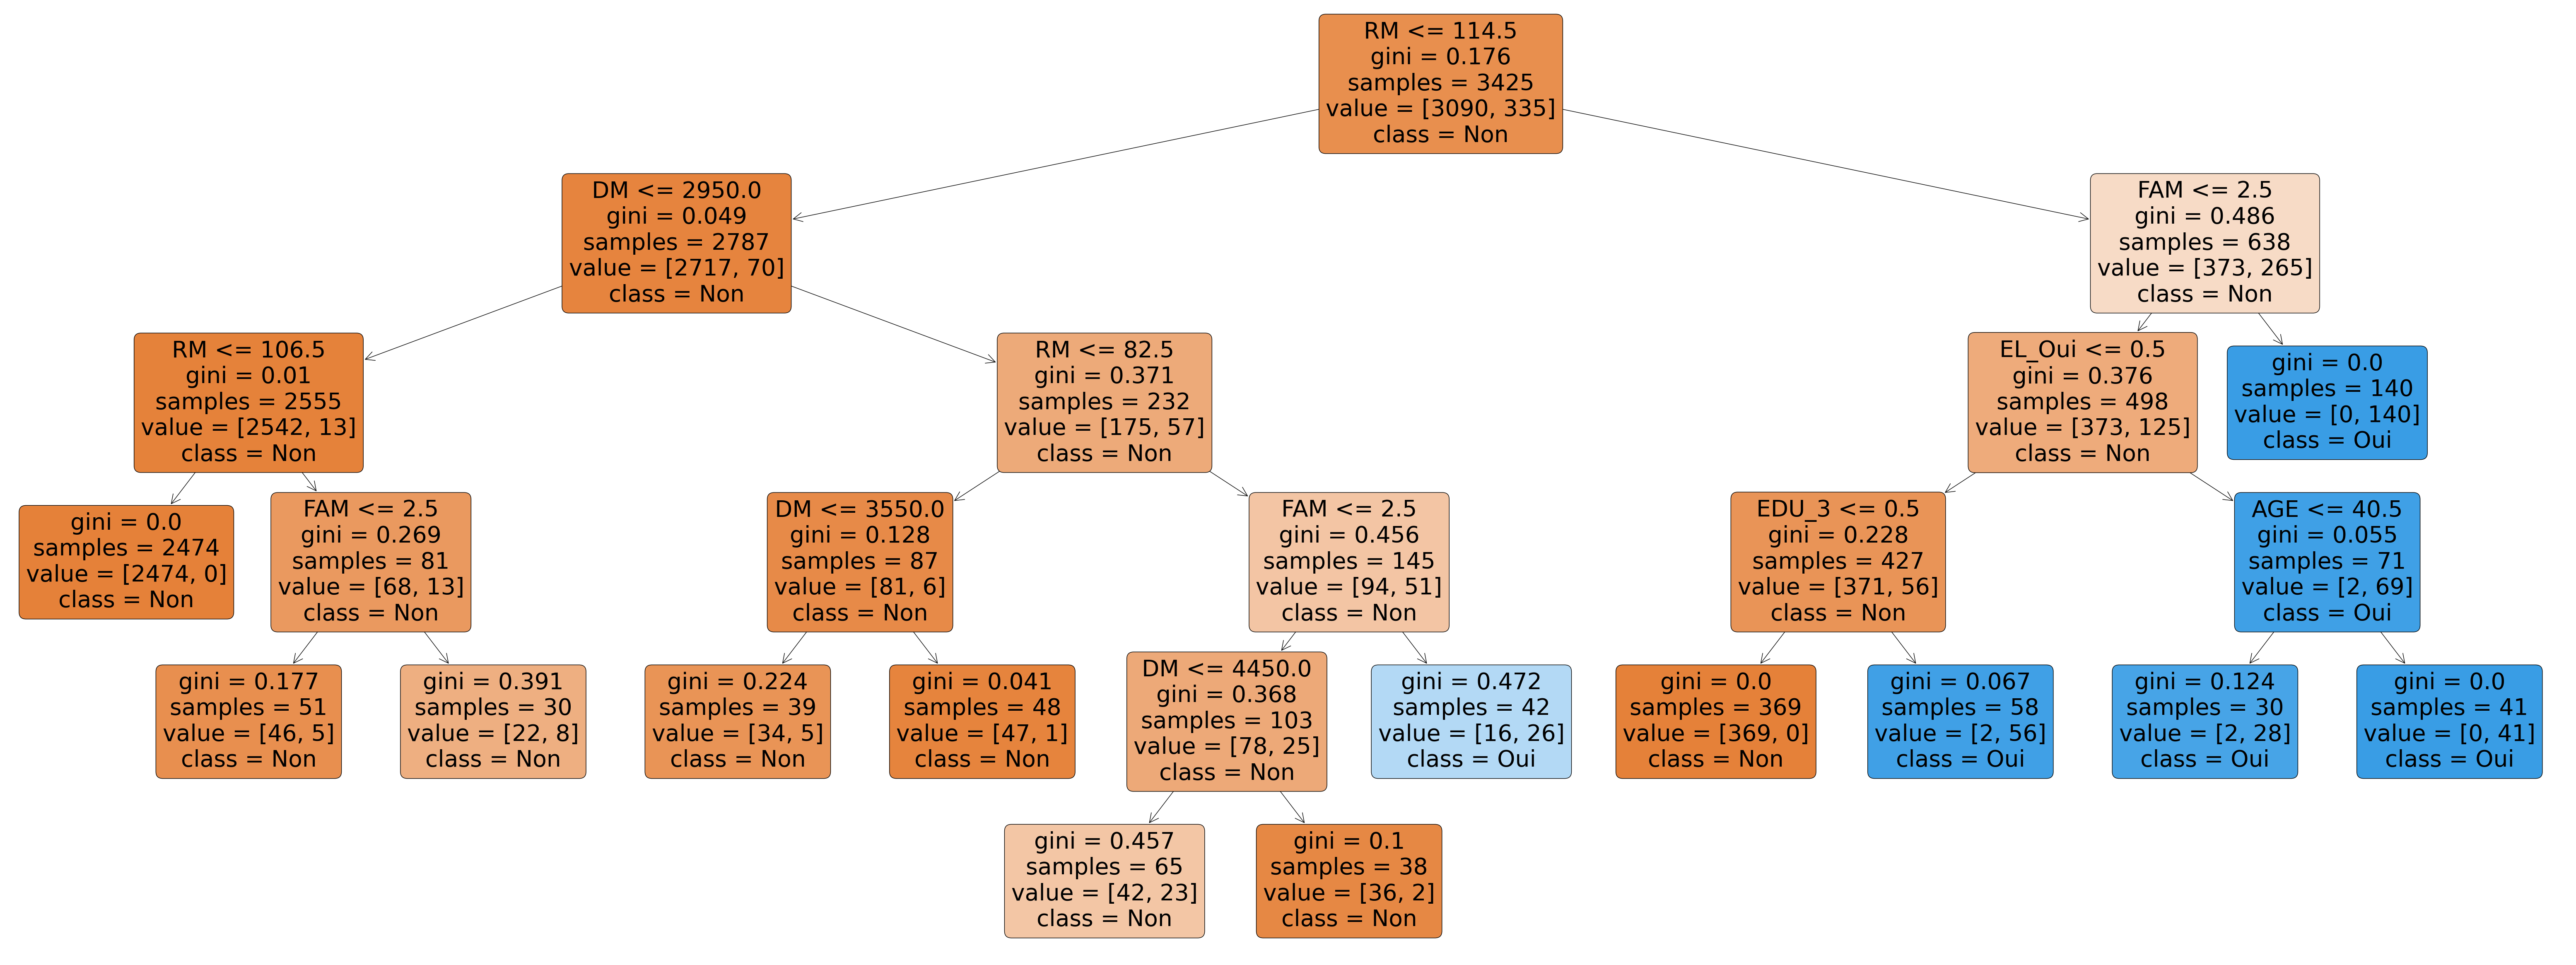

In [72]:
# Taille de la figure
plt.figure(figsize=(80, 30))
## Représentation :  
plot_tree(clf, feature_names=['AGE', 'EXP',  'RM','FAM','DM','EDU_2','EDU_3','EL_Oui'], class_names=["Non", "Oui"],filled=True,proportion=False,rounded=True )
#plt.savefig("Arbre1.png")
plt.show()

## Evaluation de l'arbre ##

In [73]:
ypred=clf.predict(X1_t)

In [74]:
ypred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [75]:
clf.predict_proba(X1_t)[:,1][:10]

array([0.        , 0.        , 0.26666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.61904762])

 Métriques d'évaluation pour l'arbre :
Exactitude: 0.9857045609257998
Précision: 0.936
Rappel: 0.9166666666666666
Matrice de confusion:


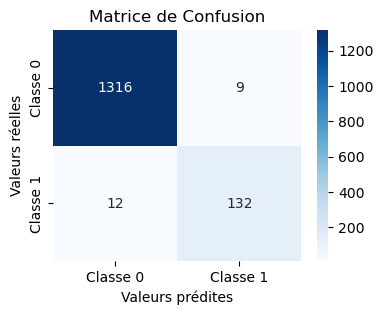

In [76]:
# Calcul des métriques d'évaluation
accuracy = accuracy_score(y1_t, ypred)
precision = precision_score(y1_t, ypred)
recall = recall_score(y1_t, ypred)

# Affichage des métriques
print('\033[1m',"Métriques d'évaluation pour l'arbre :")
print("Exactitude:", accuracy)
print("Précision:", round(precision, 3))
print("Rappel:", recall)


# Affichage de la matrice de confusion
print("Matrice de confusion:")
conf_matrix = confusion_matrix(y1_t, ypred)
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de Confusion')
plt.show()

In [77]:
clf.predict_proba(X1_t)[:,1]

array([0.        , 0.        , 0.26666667, ..., 0.35384615, 0.        ,
       1.        ])

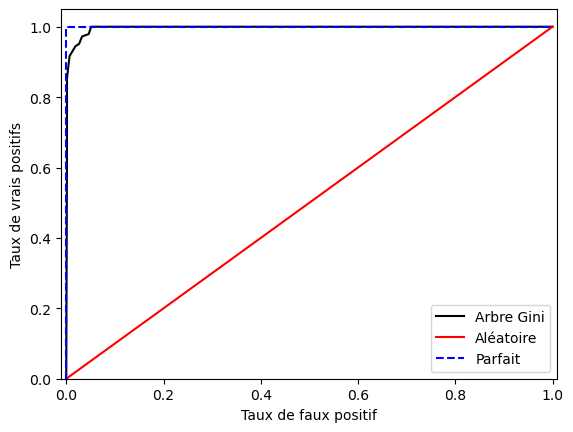

In [78]:
fpr,tpr,tr=roc_curve(y1_t,clf.predict_proba(X1_t)[:,1])

# pour le logit
plt.plot(fpr,tpr,"k-",label="Arbre Gini")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

# Parfait 

plt.plot([0,0,1], [0,1,1],"b--",label="Parfait")
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

In [79]:
au = auc(fpr, tpr) 
round(au,4)

0.9965

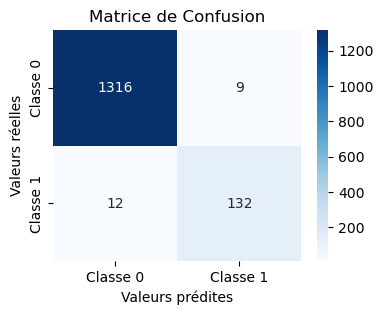

 Métriques d'évaluation pour le modèle Arbre Gini : 
Exactitude: 0.9857045609257998
Précision: 0.936
Rappel: 0.9166666666666666
L'AUC du modèle Arbre Gini est : 0.9965


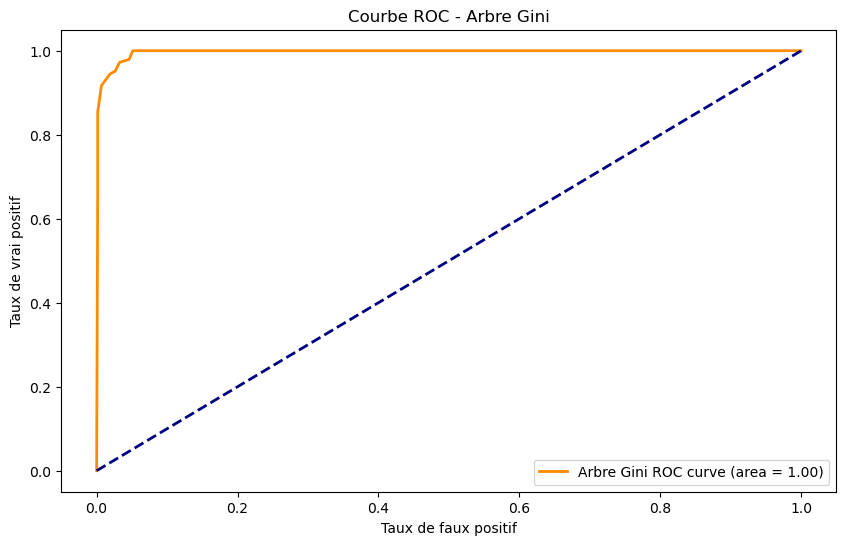

In [80]:
evaluate_model(clf, X1_t, y1_t, "Arbre Gini",plot_roc=True)

In [81]:
# Gini

clf_G= DecisionTreeClassifier(min_samples_split = 70,min_samples_leaf = 30,max_depth =5)
clf_G.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf_G.get_n_leaves()
# Nombre de nœuds 
num_branches = clf_G.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  13
Nombre de nœuds internes :  25


In [82]:
# Entropie

clf_E = DecisionTreeClassifier(criterion='entropy',min_samples_split = 70,min_samples_leaf = 30,max_depth =5)
clf_E.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf_E.get_n_leaves()
# Nombre de nœuds 
num_branches = clf_E.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  13
Nombre de nœuds internes :  25


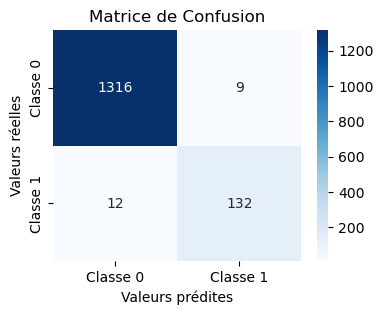

 Métriques d'évaluation pour le modèle Modèle de Gini : 
Exactitude: 0.9857045609257998
Précision: 0.936
Rappel: 0.9166666666666666
L'AUC du modèle Modèle de Gini est : 0.9965


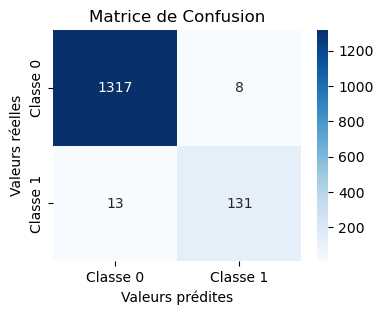

 Métriques d'évaluation pour le modèle Modèle d entropie : 
Exactitude: 0.9857045609257998
Précision: 0.942
Rappel: 0.9097222222222222
L'AUC du modèle Modèle d entropie est : 0.9966


In [83]:
## Gini

evaluate_model(clf_G,X1_t,y1_t,"Modèle de Gini")

## Entropie

evaluate_model(clf_E,X1_t,y1_t,"Modèle d entropie")


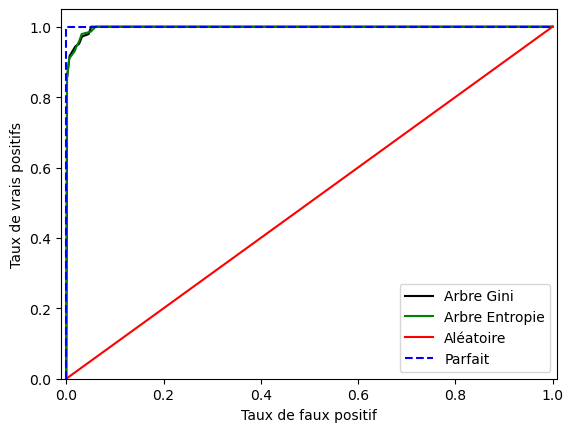

In [84]:
ypredG_prob=clf_G.predict_proba(X1_t)
ypredE_prob=clf_E.predict_proba(X1_t)

fprG,tprG,trG=roc_curve(y1_t,ypredG_prob[:,1])
fprE,tprE,trE=roc_curve(y1_t,ypredE_prob[:,1])


plt.plot(fprG,tprG,"k-",label="Arbre Gini")
plt.plot(fprE,tprE,"g-",label="Arbre Entropie")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

# Parfait 

plt.plot([0,0,1], [0,1,1],"b--",label="Parfait")
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()


In [85]:
auG = auc(fprG, tprG) 
auE = auc(fprE, tprE) 
print("L'AUC pour les eux estimations sont :")
print("Pour Gini " , round(auG,4))
print("Pour Entropie " , round(auE,4))

L'AUC pour les eux estimations sont :
Pour Gini  0.9965
Pour Entropie  0.9966


In [86]:
clf.feature_importances_

array([3.00692170e-04, 0.00000000e+00, 3.33632295e-01, 2.58014873e-01,
       5.75494361e-02, 0.00000000e+00, 1.82475443e-01, 1.68027260e-01])

Importance des variables explicatives (ordonnées par importance décroissante):
RM: 0.33363229541642103
FAM: 0.2580148734388826
EDU_2: 0.1824754427100528
EDU_3: 0.16802726012799407
DM: 0.0575494361368213
AGE: 0.0003006921698282995
EXP: 0.0
EL_Oui: 0.0


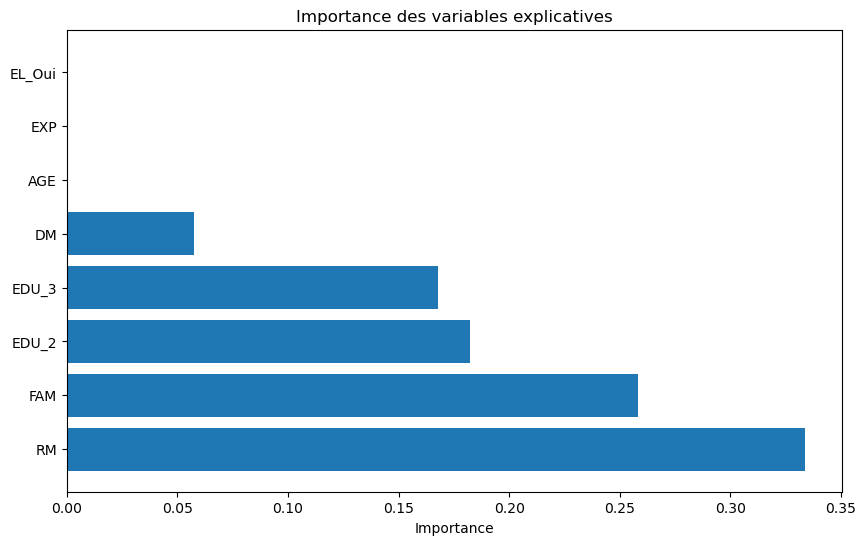

In [87]:
# Obtenir l'importance des variables explicatives
Importance = clf.feature_importances_

# Associer l'importance à chaque nom de fonctionnalité
Noms = list(X_a.columns)
Importance_dict = dict(zip(Noms, Importance))

# Trier les variables par leur importance
Importance_Classer = {k: v for k, v in sorted(Importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Afficher l'importance des variables
print("Importance des variables explicatives (ordonnées par importance décroissante):")
for feature, importance in Importance_Classer.items():
    print(f"{feature}: {importance}")

# Tracer un graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(Importance_Classer)), list(Importance_Classer.values()), align='center')
plt.yticks(range(len(Importance_Classer)), list(Importance_Classer.keys()))
plt.xlabel('Importance')
plt.title('Importance des variables explicatives')
plt.show()

## Quelques remarques concernant l'élagage

Il y a un paarmètre particulier qui s'appelle &alpha;, c'est un paramètre de complexité du modèle. Plus il est faible, plus c'est complexe et inversement, plus il est élevé plus il y aura de l'élagage de l'arbre.

Pour se faire une idée de quelles valeurs seraient appropriées, scikit-learn renvoie les alphas effectifs et les impuretés totales des feuilles correspondantes à chaque étape du processus d’élagage. Au fur et à mesure que l’alpha augmente, une plus grande partie de l’arbre est taillée, ce qui augmente l’impureté totale de ses feuilles.

In [88]:
clf = DecisionTreeClassifier()
alpha_impur = clf.cost_complexity_pruning_path(X_a, y_a)
ccp_alphas, impurities = alpha_impur.ccp_alphas, alpha_impur.impurities

In [89]:
ccp_alphas

array([0.        , 0.0001909 , 0.00021898, 0.00024331, 0.00025547,
       0.00026277, 0.00026543, 0.00027112, 0.00028534, 0.00028965,
       0.00032256, 0.00035036, 0.00038929, 0.00038929, 0.00039416,
       0.00043796, 0.00044491, 0.00045628, 0.00046345, 0.00046715,
       0.00048662, 0.00052342, 0.00056749, 0.00057097, 0.00060309,
       0.00070073, 0.00085339, 0.00090289, 0.00091099, 0.00097408,
       0.00112761, 0.00117972, 0.00162161, 0.00183625, 0.00392697,
       0.00718966, 0.02620432, 0.03579852, 0.04616775])

Text(0.5, 1.0, 'Impureté selon le alpha')

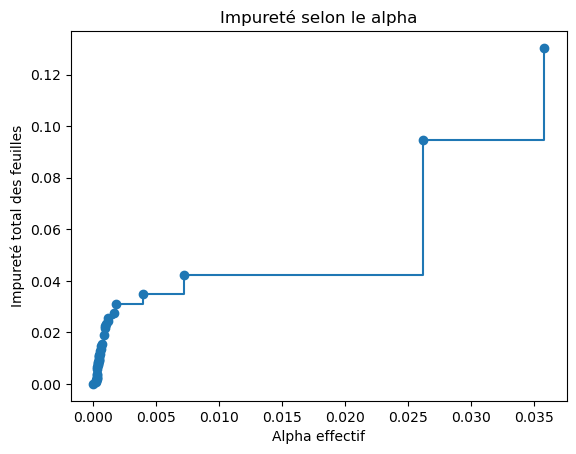

In [90]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Alpha effectif")
ax.set_ylabel("Impureté total des feuilles")
ax.set_title("Impureté selon le alpha")

In [91]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    clf.fit(X_a, y_a)
    clfs.append(clf)

clfs[:5]

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00019090398652442476),
 DecisionTreeClassifier(ccp_alpha=0.00021897810218978101),
 DecisionTreeClassifier(ccp_alpha=0.00024330900243309004),
 DecisionTreeClassifier(ccp_alpha=0.00025547445255474455)]

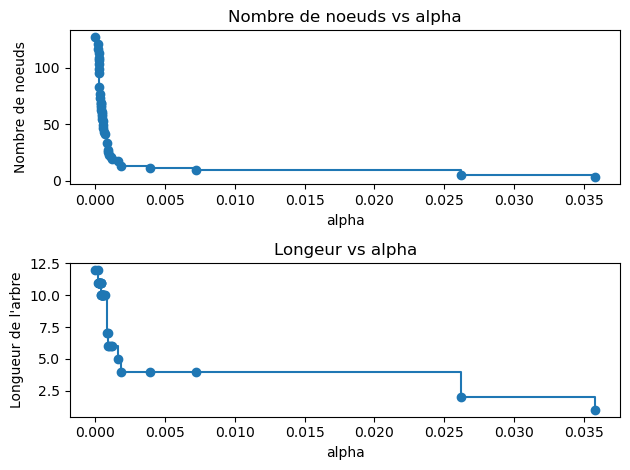

In [92]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    clf.fit(X_a, y_a)
    clfs.append(clf)
clfs = clfs[:-1]   ### On enlève ceci car il s'agit de celui avec un seul noeud.
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Nombre de noeuds")
ax[0].set_title("Nombre de noeuds vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Longueur de l'arbre")
ax[1].set_title("Longeur vs alpha")
fig.tight_layout()

In [93]:
df=pd.DataFrame({'Longueur': depth, 'Alpha': ccp_alphas})
df

Longueur     Alpha
0         12  0.000000
1         12  0.000191
2         11  0.000219
3         11  0.000243
4         11  0.000255
5         11  0.000263
6         11  0.000265
7         11  0.000271
8         11  0.000285
9         11  0.000290
10        11  0.000323
11        11  0.000350
12        11  0.000389
13        11  0.000389
14        11  0.000394
15        10  0.000438
16        10  0.000445
17        10  0.000456
18        10  0.000463
19        10  0.000467
20        10  0.000487
21        10  0.000523
22        10  0.000567
23        10  0.000571
24        10  0.000603
25        10  0.000701
26         7  0.000853
27         7  0.000903
28         6  0.000911
29         6  0.000974
30         6  0.001128
31         6  0.001180
32         5  0.001622
33         4  0.001836
34         4  0.003927
35         4  0.007190
36         2  0.026204
37         1  0.035799

In [94]:
df.loc[df['Longueur']==3, 'Alpha']

Series([], Name: Alpha, dtype: float64)

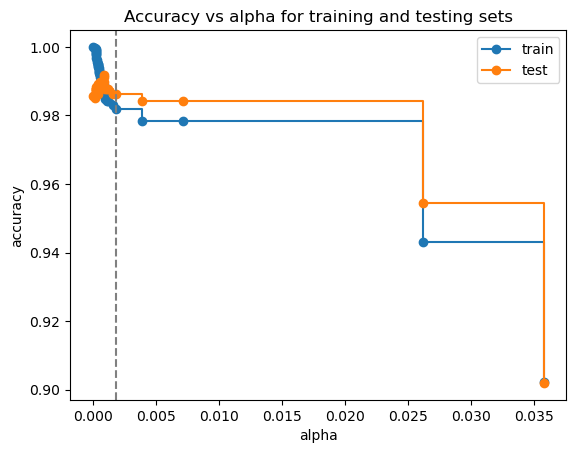

In [95]:
train_scores = [clf.score(X_a, y_a) for clf in clfs]
test_scores = [clf.score(X1_t, y1_t) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
ax.axvline(x= 0.0018362540987847814, linestyle='--', color='gray', label='Vertical Line')
ax.annotate('Alpha=  0.0018362540987847814', xy=(  0.0018362540987847814, 0.8), xytext=(  0.0018362540987847814 + 0.001, 0.8),arrowprops=dict(facecolor='black', shrink=DecisionTreeClassifier(ccp_alpha= 0.0018362540987847814)

), fontsize=8)
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Supposons que X_a et y_a sont vos features et variables cibles respectivement

# Calculer les scores de validation croisée pour différentes valeurs d'alpha
cv_scores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf, X_a, y_a, cv=5, scoring='accuracy')  # Vous pouvez changer la métrique selon vos besoins
    cv_scores.append(np.mean(scores))

# Trouver l'alpha qui donne les meilleurs scores
best_alpha = ccp_alphas[np.argmax(cv_scores)]

print("Best Alpha:", best_alpha)

# Vous pouvez ensuite utiliser la meilleure valeur d'alpha pour créer votre modèle final
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha)
final_model.fit(X_a, y_a)

# Évaluer la performance du modèle final sur un ensemble de test, si nécessaire
# ...


Best Alpha: 0.0018362540987847814


DecisionTreeClassifier(ccp_alpha=0.0018362540987847814)

### Sans prendre en compte le déséquilibre

In [97]:
clf1 = DecisionTreeClassifier(min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf1.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf1.get_n_leaves()
# Nombre de nœuds 
num_branches = clf1.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  5
Nombre de nœuds internes :  9


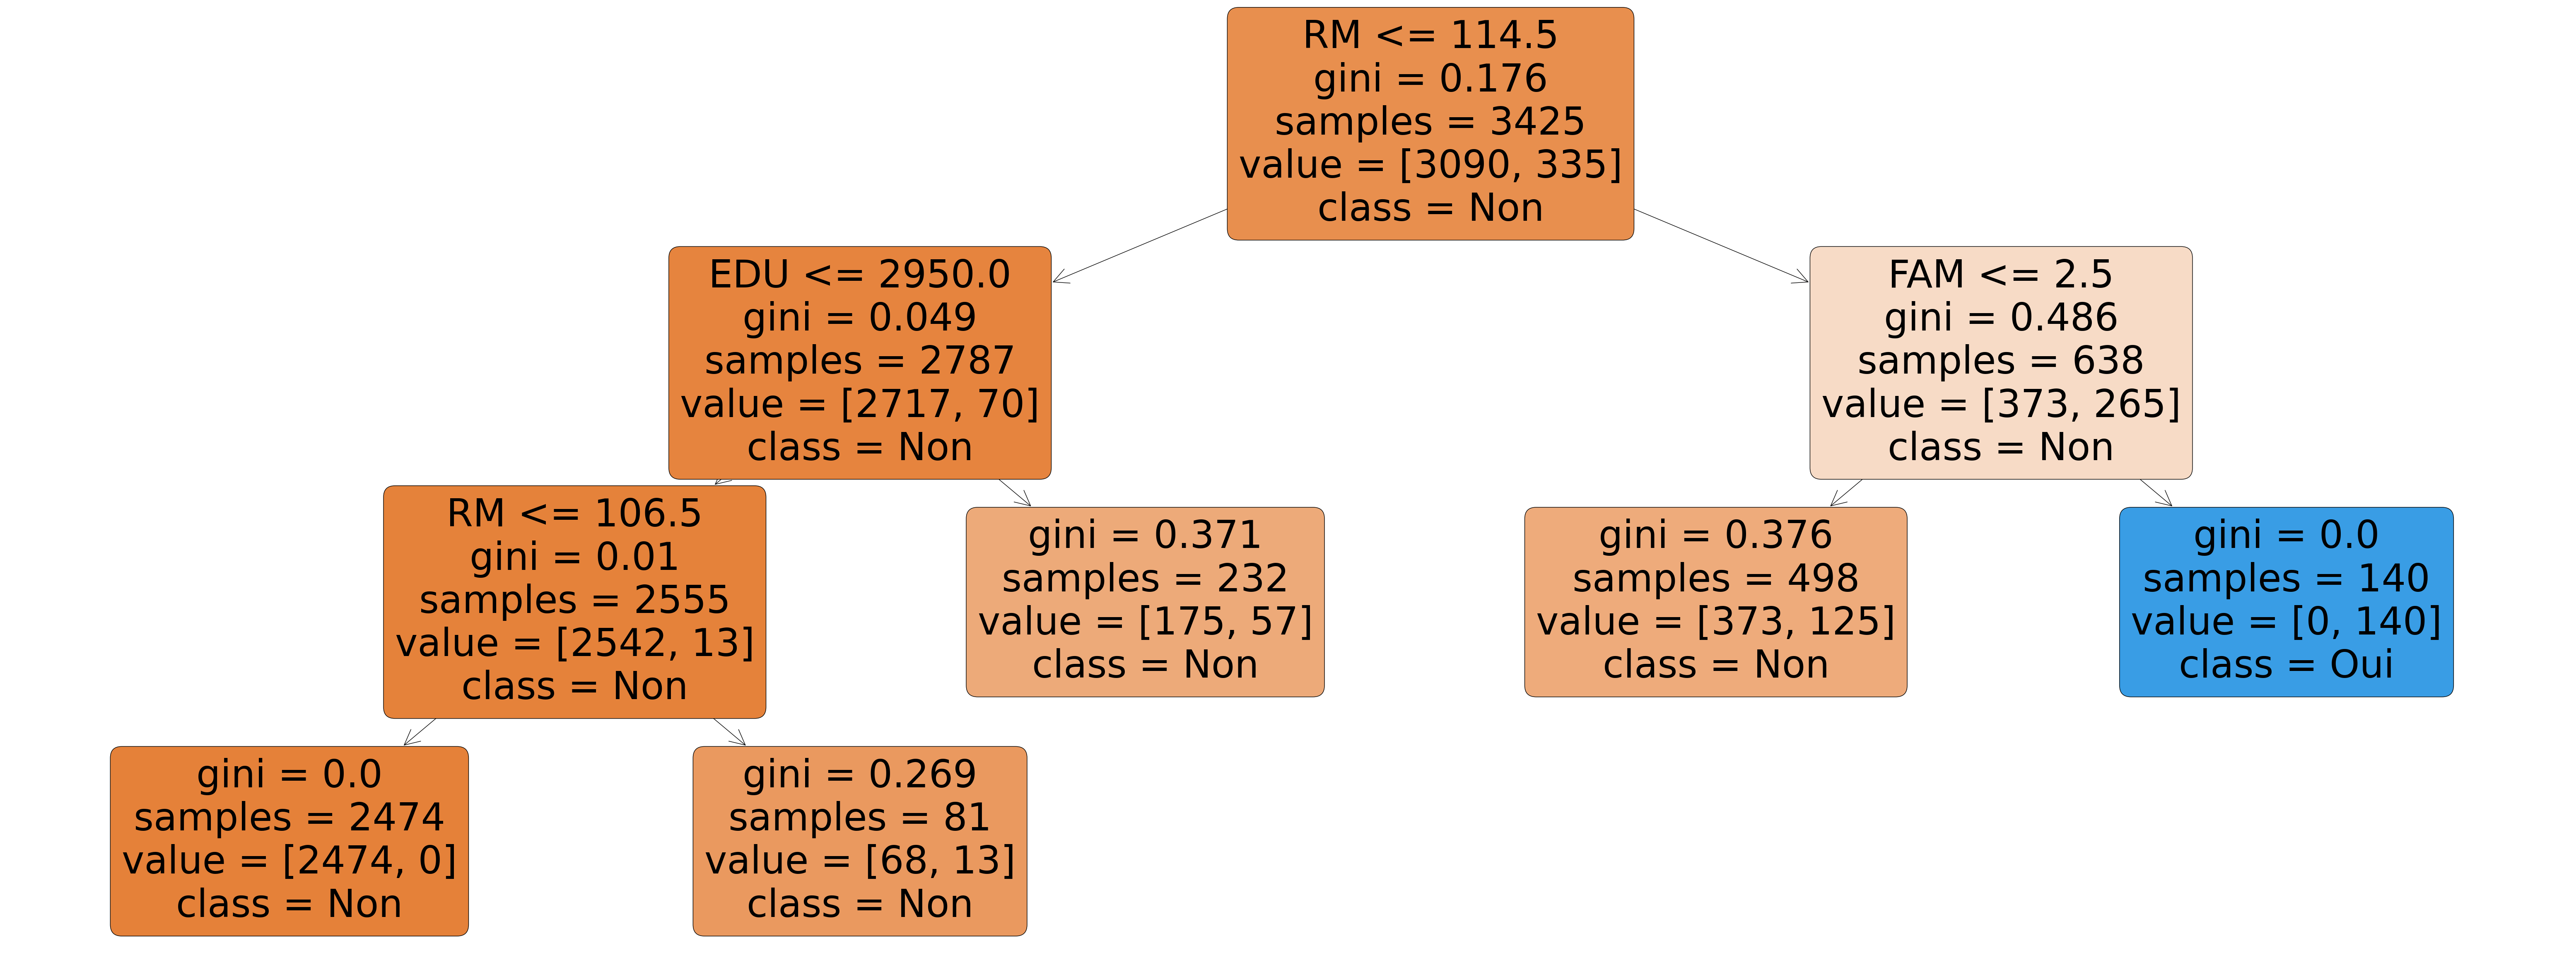

In [98]:
plt.figure(figsize=(80, 30))
## Représentation :  
plot_tree(clf1, feature_names=['AGE', 'EXP', 'RM', 'FAM',
       'EDU', 'EL_Oui'], class_names=["Non", "Oui"],filled=True,proportion=False,rounded=True )
#plt.savefig("Arbre1.png")
plt.show()

### En tenant compte du déséquilibre

Il y a une options importantes **class_weight** qui permet de gérer les poids. Avec ***"balanced*** les poids sont associés à l'inverse des fréquences de la variables expliquées.

In [99]:
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)

# Nombre de feuilles
num_leaves = clf2.get_n_leaves()
# Nombre de nœuds 
num_branches = clf2.tree_.node_count

print("Nombre de feuilles : ", num_leaves)
print("Nombre de nœuds internes : ", num_branches)

Nombre de feuilles :  6
Nombre de nœuds internes :  11


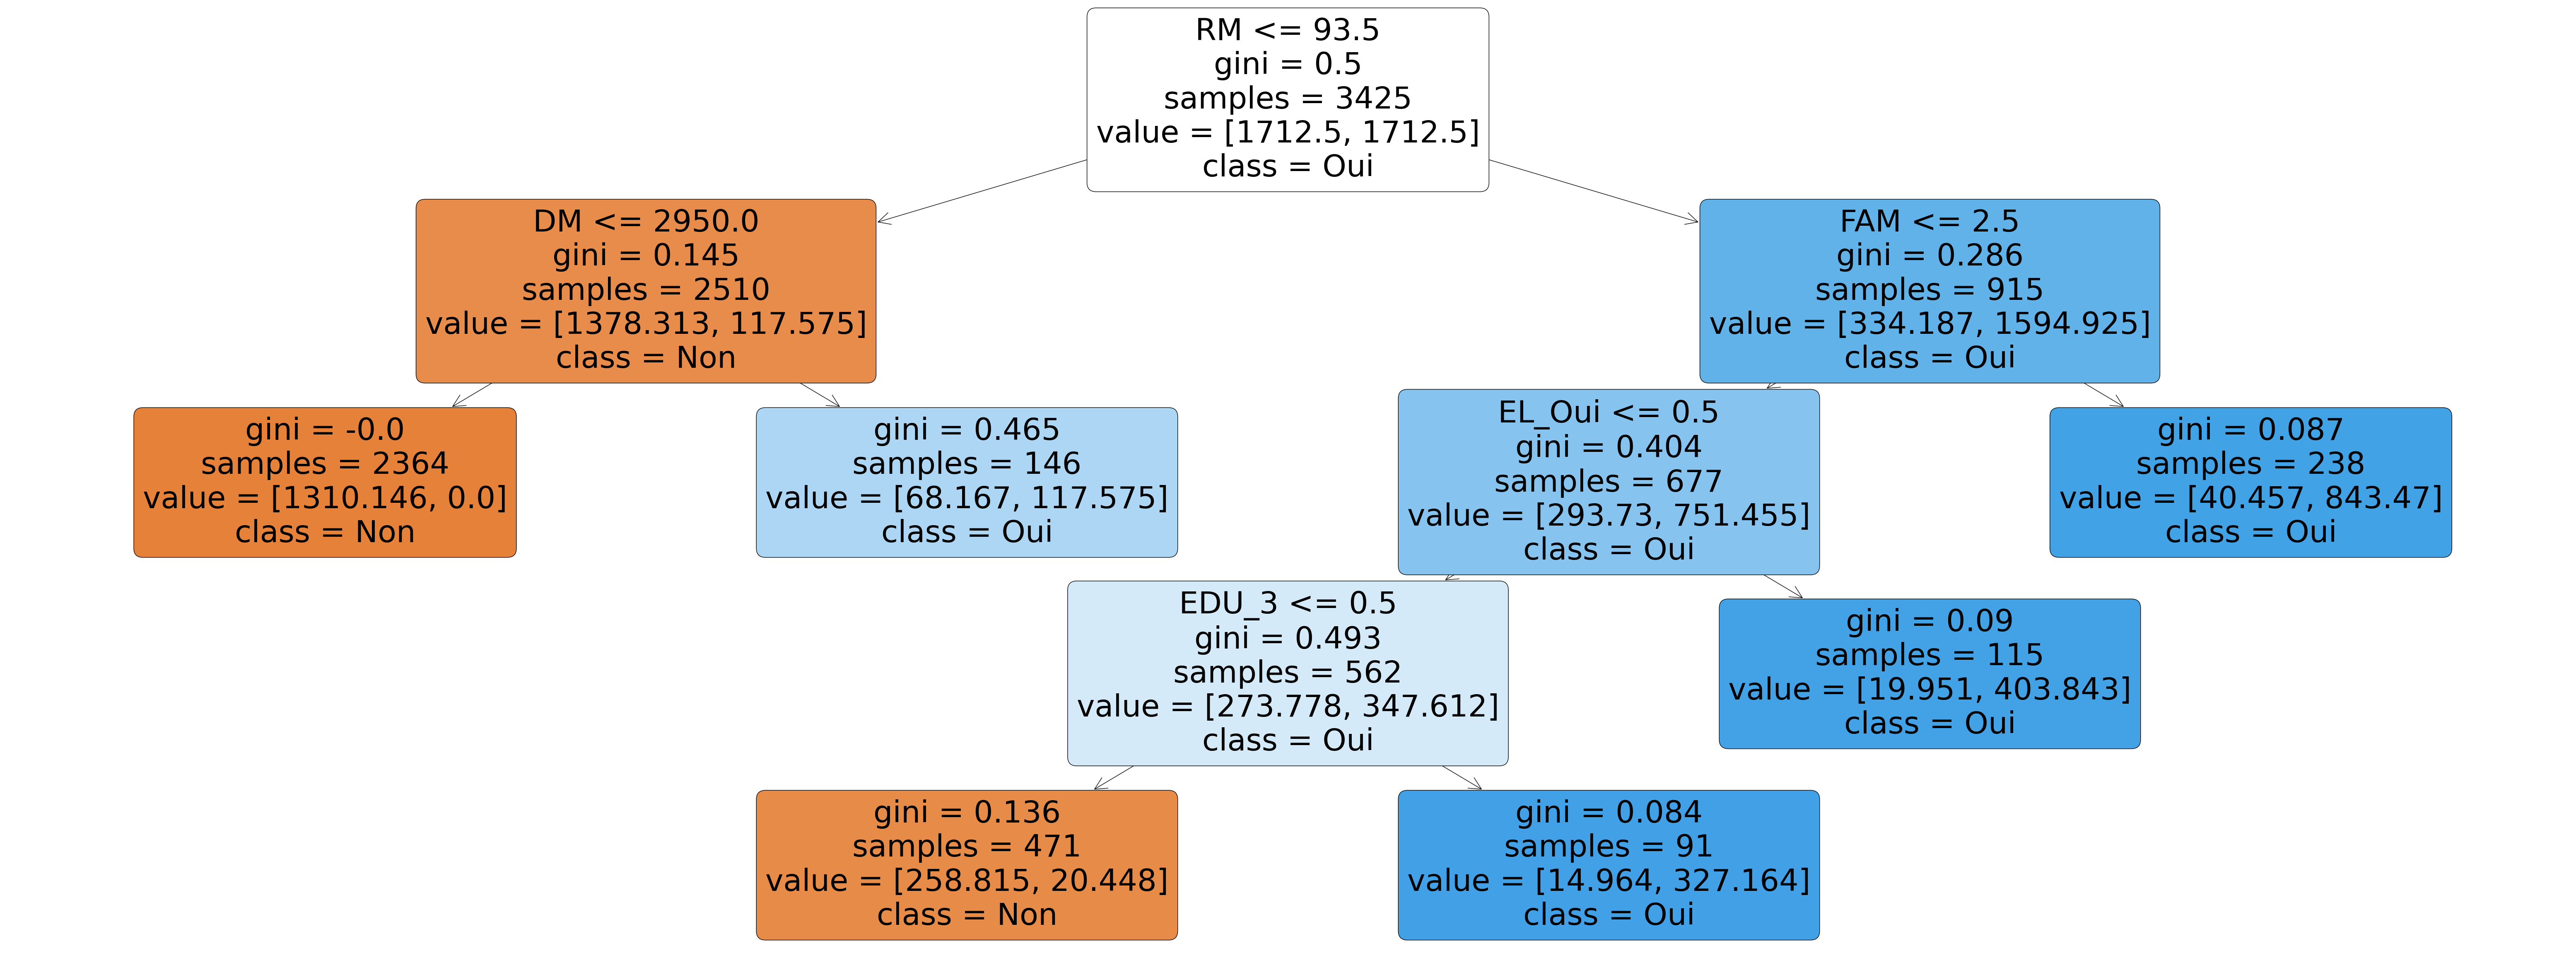

In [100]:
plt.figure(figsize=(80, 30))
## Représentation :  
plot_tree(clf2, feature_names=['AGE', 'EXP','RM','FAM','DM','EDU_2','EDU_3','EL_Oui'], class_names=["Non", "Oui"],filled=True,proportion=False,rounded=True )
#plt.savefig("Arbre1.png")
plt.show()

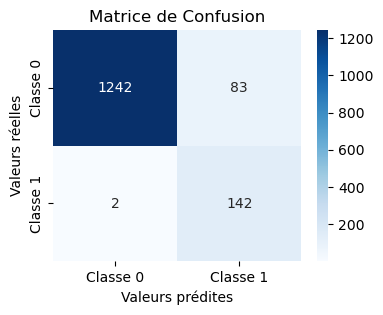

 Métriques d'évaluation pour le modèle Arbre avec les poids : 
Exactitude: 0.94213750850919
Précision: 0.631
Rappel: 0.9861111111111112
L'AUC du modèle Arbre avec les poids est : 0.9786


In [101]:
evaluate_model(clf2, X1_t, y1_t, "Arbre avec les poids")

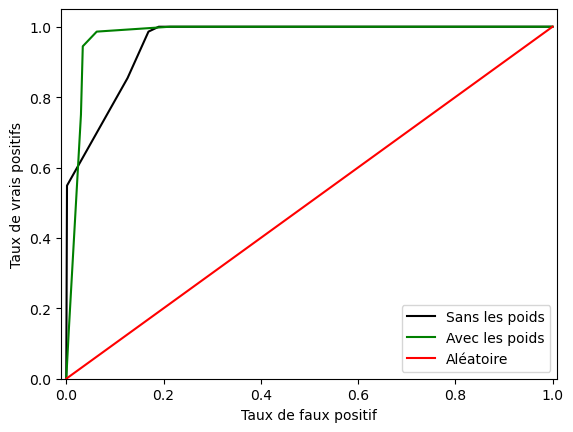

In [102]:
ypred1=clf1.predict_proba(X1_t)
ypred2=clf2.predict_proba(X1_t)

fpr1,tpr1,_=roc_curve(y1_t,ypred1[:,1])
fpr2,tpr2,_=roc_curve(y1_t,ypred2[:,1])


plt.plot(fpr1,tpr1,"k-",label="Sans les poids")
plt.plot(fpr2,tpr2,"g-",label="Avec les poids")

# Aléatoire
plt.plot([0,1],[0,1],"r-", label="Aléatoire")

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.01,1.01])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

Importance des variables explicatives (ordonnées par importance décroissante):
RM: 0.6530146633137307
EDU_2: 0.1660078411633851
DM: 0.0902539604360868
EDU_3: 0.054022082935418374
FAM: 0.03670145215137898
AGE: 0.0
EXP: 0.0
EL_Oui: 0.0


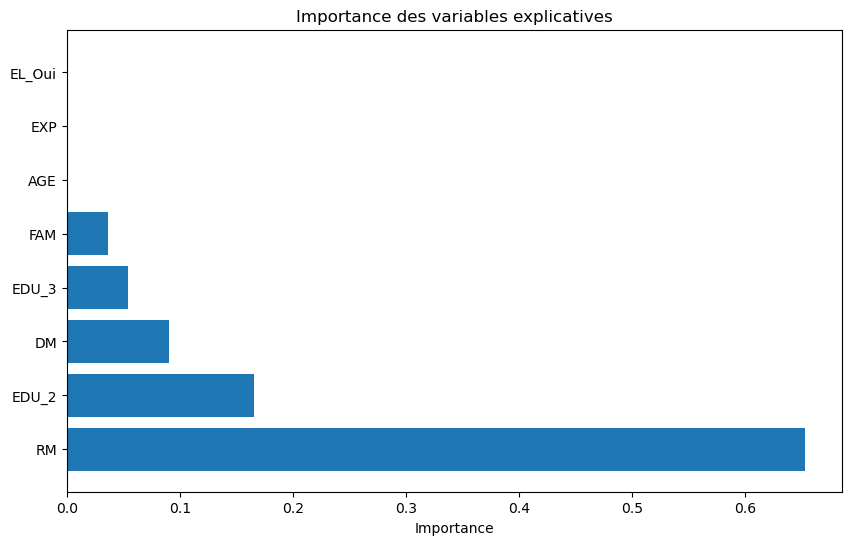

In [103]:
# Obtenir l'importance des variables explicatives
Importance = clf2.feature_importances_

# Associer l'importance à chaque nom de fonctionnalité
Noms = list(X_a.columns)
Importance_dict = dict(zip(Noms, Importance))

# Trier les variables par leur importance
Importance_Classer = {k: v for k, v in sorted(Importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Afficher l'importance des variables
print("Importance des variables explicatives (ordonnées par importance décroissante):")
for feature, importance in Importance_Classer.items():
    print(f"{feature}: {importance}")

# Tracer un graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(Importance_Classer)), list(Importance_Classer.values()), align='center')
plt.yticks(range(len(Importance_Classer)), list(Importance_Classer.keys()))
plt.xlabel('Importance')
plt.title('Importance des variables explicatives')
plt.show()

### Prévision pour un ensemble de nouveaux individus ###


In [104]:
df_Nvlle=pd.read_csv("/Users/joey/Documents/Banque_Nvlle.csv", sep=";", decimal=",",encoding="latin1") 
df_Nvlle,df_Nvlle.shape

(    ID  Age  Experience  Revenu Millier    Famille  \
 0    1   64          39                 85        4   
 1    2   52          26                 28        2   
 2    3   58          34                 41        4   
 3    4   52          22                154        1   
 4    5   43          18                 41        1   
 5    6   56          32                 33        3   
 6    7   37          12                182        3   
 7    8   53          27                 59        2   
 8    9   27           2                129        2   
 9   10   53          27                 35        3   
 10  11   42          16                185        3   
 11  12   58          34                 45        4   
 12  13   36          12                 62        4   
 13  14   53          28                183        3   
 14  15   48          22                 14        2   
 15  16   54          28                 53        1   
 16  17   26           1                 48     

In [105]:
df_Nvlle=df_Nvlle.drop(columns=['ID'])
var = df_Nvlle.columns
print(var)

Index(['Age', 'Experience', 'Revenu Millier  ', 'Famille',
       'Dépense mensuellesmoyenne   ', 'Education',
       'Compte Epargne Logement'],
      dtype='object')


In [106]:
df_Nvlle.columns=['AGE','EXP','RM','FAM','DM','EDU','EL']

In [107]:
df_Nvlle1 = pd.get_dummies(df_Nvlle, columns=(['EL','EDU']),drop_first=True).astype(int)
df_Nvlle1[0:3]

AGE  EXP  RM  FAM    DM  EL_Oui  EDU_2  EDU_3
0   64   39  85    4  3400       0      1      0
1   52   26  28    2   700       0      1      0
2   58   34  41    4   400       0      0      0

In [108]:
pd.DataFrame(proba_Nouveau, columns=["Non", "Oui"]).sort_values(by='Oui',ascending=False)

NameError: name 'proba_Nouveau' is not defined

## SVM

In [116]:
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sys
from sklearn import svm
import seaborn as sns

In [117]:
# Créer un modèle SVM linéaire
clf1= svm.SVC(kernel='linear',probability=True)
clf1.fit(X_a, y_a)


SVC(kernel='linear', probability=True)

In [118]:
clf1.fit(X_a, y_a)

SVC(kernel='linear', probability=True)

In [119]:
# Afficher les vecteurs de support
print("Nombre de Vecteurs de support:")
print(len(clf1.support_vectors_))

print("Vecteurs de support:")
print(clf1.support_vectors_[1:5])

Nombre de Vecteurs de support:
313
Vecteurs de support:
[[ 5.20e+01  2.80e+01  9.10e+01  4.00e+00  1.00e+03  0.00e+00  1.00e+00
   0.00e+00]
 [ 2.50e+01 -1.00e+00  1.01e+02  4.00e+00  2.30e+03  0.00e+00  0.00e+00
   1.00e+00]
 [ 3.50e+01  5.00e+00  8.10e+01  4.00e+00  4.00e+03  0.00e+00  0.00e+00
   1.00e+00]
 [ 6.50e+01  3.90e+01  1.41e+02  2.00e+00  6.90e+03  0.00e+00  0.00e+00
   0.00e+00]]


In [120]:
ypred=clf1.predict(X1_t)

In [121]:
pd.DataFrame(ypred).value_counts()

0    1345
1     124
Name: count, dtype: int64

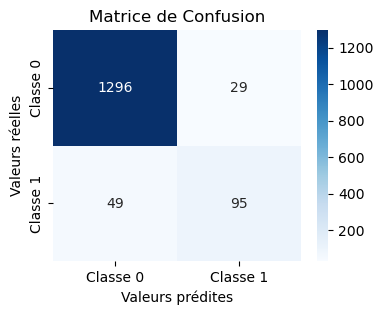

 Métriques d'évaluation pour le modèle SVM1 : 
Exactitude: 0.9469026548672567
Précision: 0.766
Rappel: 0.6597222222222222
F1-score: 0.709
L'AUC du modèle SVM1 est : 0.9296


In [122]:
FPR1,TPR1,AUC1=evaluate_model(clf1,X1_t,y1_t,"SVM1")

In [124]:
parametres= { "kernel":["linear","poly","rbf","sigmoid"]}
svmC=SVC()
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring= 'roc_auc')
resultats= grille.fit(X1_t,y_t)
print(resultats.best_params_)

{'kernel': 'linear'}


In [125]:
parametres= { "C":[0.1,1,10,20]}
svmC=SVC(kernel='linear')
grille=GridSearchCV(estimator=svmC ,param_grid=parametres,scoring='roc_auc')
resultats= grille.fit(X1_t,y1_t)
print(resultats.best_params_)

{'C': 0.1}


In [126]:
# Créer un modèle SVM linéaire
SVM2= svm.SVC(kernel='linear',C=0.1, probability=True)
SVM2.fit(X1_t, y1_t)

SVC(C=0.1, kernel='linear', probability=True)

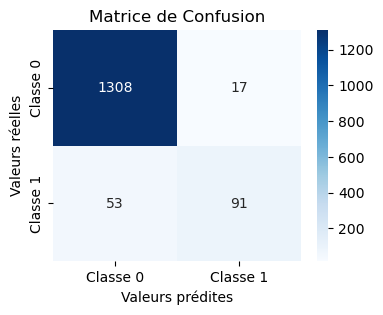

 Métriques d'évaluation pour le modèle SVM2 : 
Exactitude: 0.9523485364193329
Précision: 0.843
Rappel: 0.6319444444444444
F1-score: 0.722
L'AUC du modèle SVM2 est : 0.9609


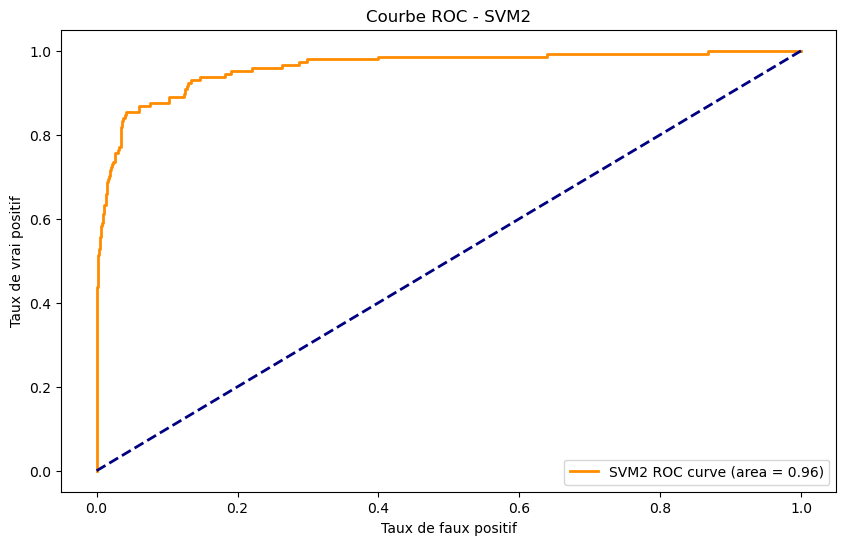

In [127]:
FPR2,TPR2,AUC2=evaluate_model(SVM2,X1_t,y1_t,"SVM2", plot_roc=True)

In [128]:
clf1 = svm.SVC(kernel="linear", class_weight={1: 10}, probability=True)
#clf1 = svm.SVC(kernel="linear", class_weight='balanced', probability=True)
clf1.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear', probability=True)

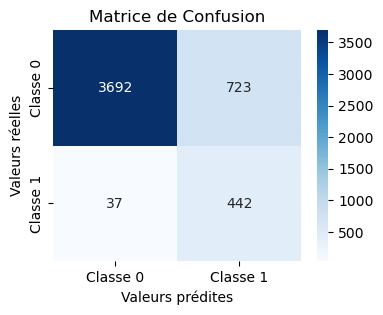

 Métriques d'évaluation pour le modèle Avec poids : 
Exactitude: 0.8447078054760931
Précision: 0.379
Rappel: 0.9227557411273486
F1-score: 0.538
L'AUC du modèle Avec poids est : 0.9480


In [129]:
tpr1,fpr1,auc1=evaluate_model(clf1,X,y,"Avec poids")

In [130]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf1,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    clf2,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["Avec les poids", "Sans les poids"],
    loc="upper right",labelcolor=['red','black']
)
plt.xlabel("X1")
plt.ylabel("X2")

plt.suptitle("Valeur de y selon X1 et X2")

plt.grid()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

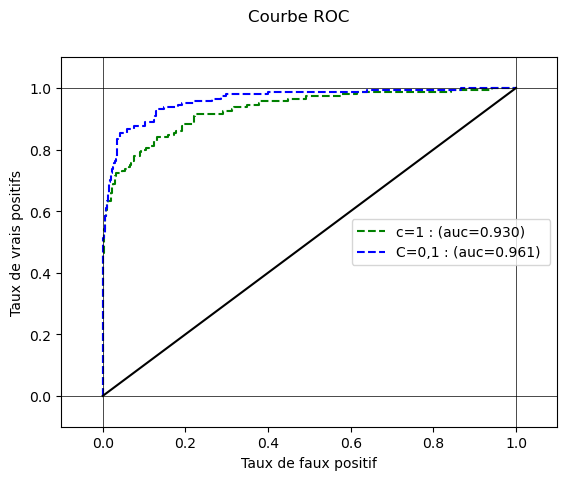

In [131]:
## Courbe ROC pour les 4 modèles

plt.plot(FPR1,TPR1,"g--",label='c=1 : (auc={:.3f}) '.format(AUC1))
plt.plot(FPR2,TPR2,"b--",label='C=0,1 : (auc={:.3f}) '.format(AUC2))

# Aléatoire

plt.plot([0,1],[0,1],"k-")

# Axes à l'origine
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(1, color='black',linewidth=0.5)

# plt.plot([0,0,1], [0,1,1],"k-") # ,label="Parfait"
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.legend()
plt.suptitle("Courbe ROC ")
plt.show()

**Bagging**

In [73]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
from numpy import mean
from numpy import std
import os
#os.chdir('C:/Users/tyuiop/Desktop/Perron')

# Scikit-Learn
import sklearn as sk
from sklearn.linear_model import LogisticRegression    
from sklearn import svm
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as n

# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 


# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

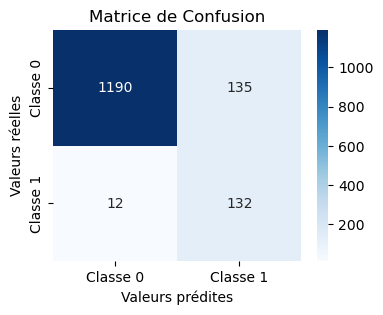

 Métriques d'évaluation pour le modèle Bagging Logit : 
Exactitude: 0.9
Précision: 0.49
Rappel: 0.92
L'AUC du modèle Bagging Logit est : 0.9074


TypeError: cannot unpack non-iterable NoneType object

In [74]:

L=LogisticRegression(class_weight="balanced")
Bag_Log = BaggingClassifier(estimator=L,n_estimators=100)
Bag_Log.fit(X_a, y_a)
fpr_Bag2, tpr_Bag2, auc_Bag2=evaluate_model(Bag_Log,X1_t,y1_t,"Bagging Logit")


/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

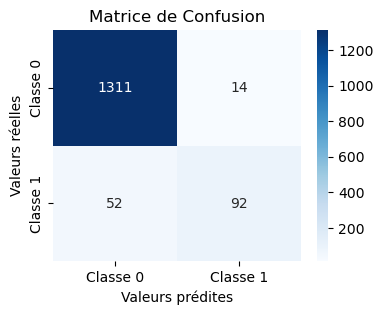

 Métriques d'évaluation pour le modèle Bagging Probit : 
Exactitude: 0.96
Précision: 0.87
Rappel: 0.64
L'AUC du modèle Bagging Probit est : 0.8142


TypeError: cannot unpack non-iterable NoneType object

In [75]:


# Création du modèle de régression probit avec statsmodels
probit_model = sm.GLM(y_a, X_a, freq_weights=inverse_frequences, family=sm.families.Binomial())
result_probit = probit_model.fit()

# Conversion des coefficients pour scikit-learn
coef_sklearn_probit = np.column_stack((result_probit.params, result_probit.bse)).flatten()

# Création du modèle probit avec scikit-learn
probit_sklearn = LogisticRegression(fit_intercept=False)
probit_sklearn.coef_ = coef_sklearn_probit

# Création du modèle Bagging avec la régression probit comme estimateur de base
Bag_Probit = BaggingClassifier(base_estimator=probit_sklearn, n_estimators=100, random_state=42)
Bag_Probit.fit(X_a, y_a)

# Évaluation du modèle
fpr_Bag_probit, tpr_Bag_probit, auc_Bag_probit = evaluate_model(Bag_Probit, X1_t, y1_t, "Bagging Probit")


In [76]:
# Les arbres 
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)
# Création du modéle
Bag_Arbre = BaggingClassifier(estimator=clf2,n_estimators=500,random_state=12)
Bag_Arbre.fit(X_a, y_a)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=5,
                                                   min_samples_leaf=50,
                                                   min_samples_split=500),
                  n_estimators=500, random_state=12)

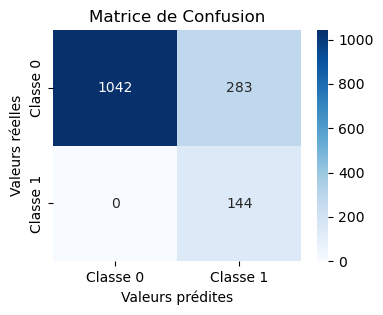

 Métriques d'évaluation pour le modèle Bagging Arbres : 
Exactitude: 0.81
Précision: 0.34
Rappel: 1.0
L'AUC du modèle Bagging Arbres est : 0.8932


TypeError: cannot unpack non-iterable NoneType object

In [86]:
fpr_Bag1, tpr_Bag1, auc_Bag1=evaluate_model(Bag_Arbre,X1_t,y1_t,"Bagging Arbres")

**Random Forest**

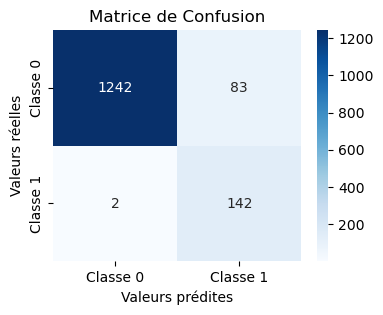

 Métriques d'évaluation pour le modèle Random Forest : 
Exactitude: 0.94
Précision: 0.63
Rappel: 0.99
L'AUC du modèle Random Forest est : 0.9617


TypeError: cannot unpack non-iterable NoneType object

In [85]:
# Créer le modèle de Random Forest
clf2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
clf2.fit(X_a, y_a)
# Entraîner le modèle sur l'ensemble d'entraînement
clf2.fit(X_a, y_a)

fpr_RF,tpr_RF,auc_RF=evaluate_model(clf2,X1_t,y1_t,"Random Forest")

#### **Boosting** ####

On va le faire avec des arbres.

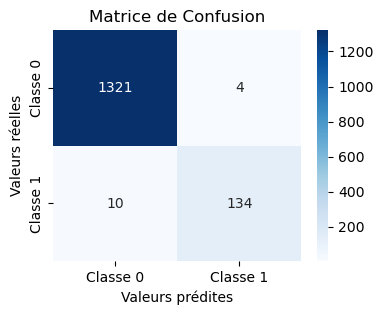

 Métriques d'évaluation pour le modèle AdaBoost : 
Exactitude: 0.99
Précision: 0.97
Rappel: 0.93
L'AUC du modèle AdaBoost est : 0.9638


TypeError: cannot unpack non-iterable NoneType object

In [79]:

Tree = DecisionTreeClassifier(class_weight='balanced',min_samples_split = 500,min_samples_leaf = 50,max_depth =5)
model3 = AdaBoostClassifier(estimator=Tree, n_estimators=500)

# Entraîner le modèle
model3.fit(X_a, y_a)

fpr_Ada,tpr_Ada,auc_Ada=evaluate_model(model3,X1_t,y1_t,"AdaBoost")

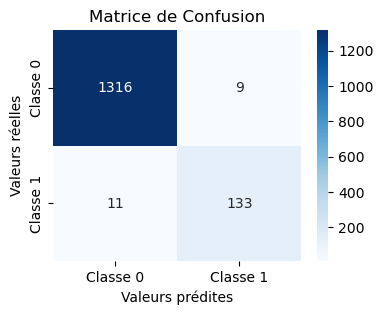

 Métriques d'évaluation pour le modèle Gradient Boosting : 
Exactitude: 0.99
Précision: 0.94
Rappel: 0.92
L'AUC du modèle Gradient Boosting est : 0.9584


TypeError: cannot unpack non-iterable NoneType object

In [80]:
# Créer un modèle Gradient Boosting
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model4.fit(X_a,y_a)

fpr_Boost,tpr_Boost,auc_Boost=evaluate_model(model4,X1_t,y1_t,"Gradient Boosting")

In [87]:
## Courbe ROC pour les 5 modèles

plt.plot(fpr_Bag1,tpr_Bag1,"b--",label='Bagging : (auc={:.3f}) '.format(auc_Bag1))
plt.plot(fpr_RF,tpr_RF,"r-",label='Random Forest : (auc={:.3f}) '.format(auc_RF))
plt.plot(fpr_Ada,tpr_Ada,"y-",label='AdaBoosting : (auc={:.3f}) '.format(auc_Ada))
plt.plot(fpr_Boost,tpr_Boost,"k-",label='GBoosting : (auc={:.3f}) '.format(auc_Boost))
# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

# Parfait 

# Axes à l'origine
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(1, color='black',linewidth=0.5)


# plt.plot([0,0,1], [0,1,1],"k-") # ,label="Parfait"
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.legend()
plt.suptitle("Courbe ROC ")
plt.show()

NameError: name 'fpr_Bag1' is not defined

In [89]:
df_Nvlle=pd.read_csv("/Users/joey/Documents/Banque_Nvlle.csv", sep=";", decimal=",",encoding="latin1") 
df_Nvlle,df_Nvlle.shape

(    ID  Age  Experience  Revenu Millier    Famille  \
 0    1   64          39                 85        4   
 1    2   52          26                 28        2   
 2    3   58          34                 41        4   
 3    4   52          22                154        1   
 4    5   43          18                 41        1   
 5    6   56          32                 33        3   
 6    7   37          12                182        3   
 7    8   53          27                 59        2   
 8    9   27           2                129        2   
 9   10   53          27                 35        3   
 10  11   42          16                185        3   
 11  12   58          34                 45        4   
 12  13   36          12                 62        4   
 13  14   53          28                183        3   
 14  15   48          22                 14        2   
 15  16   54          28                 53        1   
 16  17   26           1                 48     

In [90]:
df_Nvlle=df_Nvlle.drop(columns=['ID'])
var = df_Nvlle.columns
print(var)

Index(['Age', 'Experience', 'Revenu Millier  ', 'Famille',
       'Dépense mensuellesmoyenne   ', 'Education',
       'Compte Epargne Logement'],
      dtype='object')


In [91]:
df_Nvlle.columns=['AGE','EXP','RM','FAM','DM','EDU','EL']

In [94]:
df_Nvlle1 = pd.get_dummies(df_Nvlle, columns=(['EL','EDU']),drop_first=True).astype(int)
df_Nvlle1[0:3]

AGE  EXP  RM  FAM    DM  EL_Oui  EDU_2  EDU_3
0   64   39  85    4  3400       0      1      0
1   52   26  28    2   700       0      1      0
2   58   34  41    4   400       0      0      0

In [95]:
prev1=pd.Series(list(Bag_Arbre.predict(df_Nvlle1)))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AGE
- EXP
Feature names seen at fit time, yet now missing:
- const


In [96]:
import pandas as pd

# Supposons que df_predictions soit votre DataFrame de prédictions
# Vous pouvez l'utiliser directement comme suit
df_predictions = pd.DataFrame({'Prediction_mod1': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]})

# Comptez le nombre de 1 et 0 dans la colonne 'Prediction_mod1'
nombre_de_1 = df_predictions['Prediction_mod1'].sum()
nombre_de_0 = len(df_predictions) - nombre_de_1

# Affichez les résultats
print("Total de 1 :", nombre_de_1)
print("Total de 0 :", nombre_de_0)


Total de 1 : 9
Total de 0 : 21


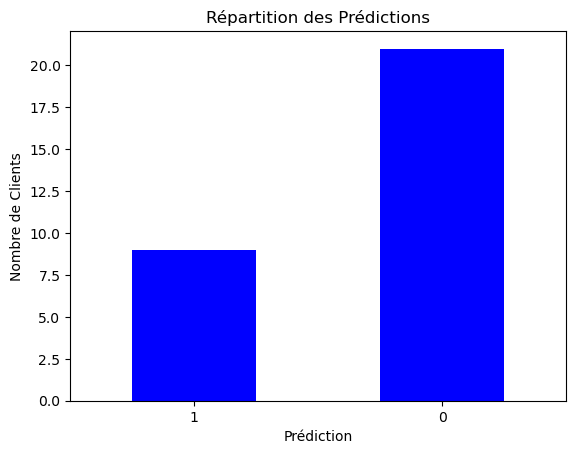

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_predictions soit votre DataFrame de prédictions
df_predictions = pd.DataFrame({'Prediction_mod1': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]})

# Comptez le nombre de 1 et 0 dans la colonne 'Prediction_mod1'
nombre_de_1 = df_predictions['Prediction_mod1'].sum()
nombre_de_0 = len(df_predictions) - nombre_de_1

# Créez un DataFrame pour le graphique
resultats_df = pd.DataFrame({'Total': [nombre_de_1, nombre_de_0]}, index=['1', '0'])

# Affichez le graphique à barres
resultats_df.plot(kind='bar', legend=False, color=['blue', 'orange'])
plt.xlabel('Prédiction')
plt.ylabel('Nombre de Clients')
plt.title('Répartition des Prédictions')
plt.xticks(rotation=0)
plt.show()


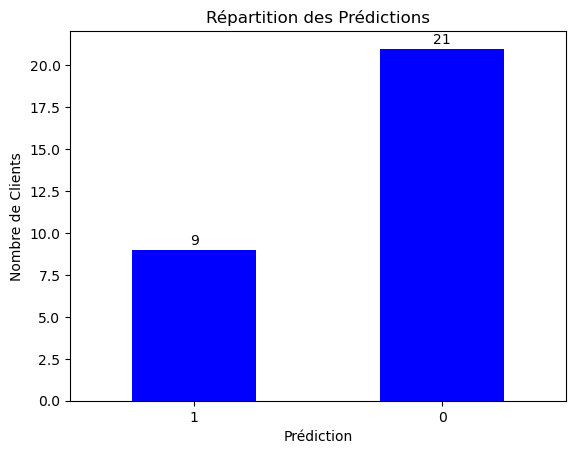

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_predictions soit votre DataFrame de prédictions
df_predictions = pd.DataFrame({'Prediction_mod1': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]})

# Comptez le nombre de 1 et 0 dans la colonne 'Prediction_mod1'
nombre_de_1 = df_predictions['Prediction_mod1'].sum()
nombre_de_0 = len(df_predictions) - nombre_de_1

# Créez un DataFrame pour le graphique
resultats_df = pd.DataFrame({'Total': [nombre_de_1, nombre_de_0]}, index=['1', '0'])

# Affichez le graphique à barres
ax = resultats_df.plot(kind='bar', legend=False, color=['blue', 'orange'])
plt.xlabel('Prédiction')
plt.ylabel('Nombre de Clients')
plt.title('Répartition des Prédictions')
plt.xticks(rotation=0)

# Ajoutez les annotations de chaque barre
for i, valeur in enumerate(resultats_df['Total']):
    plt.text(i, valeur + 0.1, str(valeur), ha='center', va='bottom')

plt.show()
